In [1]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
#Data collection and processing
car_dataset = pd.read_csv("car data.csv")

In [3]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
#Getting some informations about the datset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
car_dataset['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [8]:
car_dataset['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [9]:
car_dataset['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

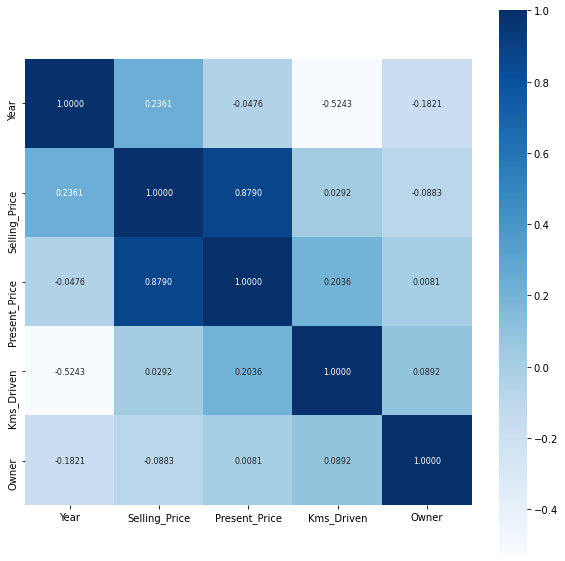

In [10]:
correlation = car_dataset.corr()
#Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.4f',annot=True,annot_kws={'size':8},cmap="Blues")

In [11]:
#Encoding the categorical data

#Encoding fuel type column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#Encoding seller type column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#Encoding transmission type column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [13]:
#Splitting data into training data and test data
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [15]:
#Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,Y_train)

LinearRegression()

In [16]:
#Model Evaluation
#Prediction on training data
training_data_prediction = linear_reg_model.predict(X_train)

In [17]:
#R Squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8799451660493706


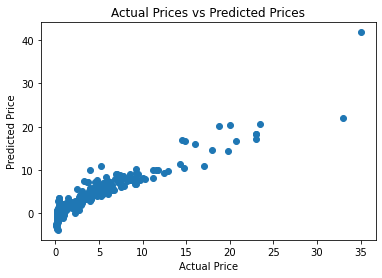

In [18]:
#Visualize the actual values and Preducted Prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [19]:
#Prediction on testing data
testing_data_prediction = linear_reg_model.predict(X_test)
#R Squared Error
error_score = metrics.r2_score(Y_test,testing_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8365766715024756


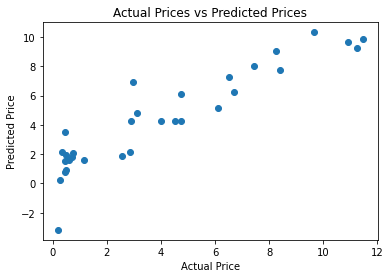

In [20]:
#Visualize the actual values and Preducted Prices
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

R squared Error :  0.8427856123435793


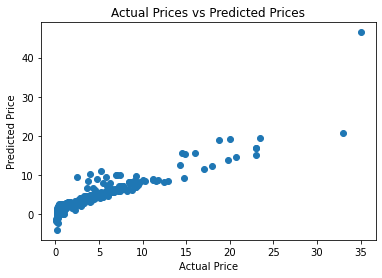

R squared Error :  0.8365766715024756


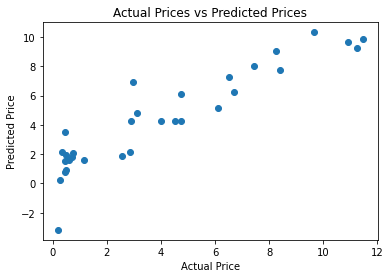

In [21]:
#Lasso Regression
#Linear Regression model
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train,Y_train)

#Model Evaluation
#Prediction on training data
training_data_prediction = lasso_reg_model.predict(X_train)

#R Squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ",error_score)

#Visualize the actual values and Preducted Prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

#Prediction on testing data
testing_data_prediction = linear_reg_model.predict(X_test)
#R Squared Error
error_score = metrics.r2_score(Y_test,testing_data_prediction)
print("R squared Error : ",error_score)

#Visualize the actual values and Preducted Prices
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()